In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

df = pd.read_csv (r'C:\Users\Huhu\Downloads\data_csv.csv')
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1881-01-01,6.19,0.27,0.49,9.42,3.70,164.18,7.03,12.89,18.47
1,1881-02-01,6.17,0.27,0.48,9.51,3.69,162.01,7.09,12.65,18.15
2,1881-03-01,6.24,0.28,0.48,9.51,3.69,163.85,7.22,12.54,18.27
3,1881-04-01,6.22,0.28,0.47,9.61,3.68,161.71,7.28,12.31,17.95
4,1881-05-01,6.50,0.28,0.47,9.51,3.67,170.68,7.48,12.32,18.87


In [4]:
#I treat Real Earnings as our response variable
#You can also use anyother features you are interested as our response variable
df1 = df.copy(deep=False)


## I'm going to take a subset of the data i.e.from 2012 to the 5-year trend

import datetime
datetime.datetime.strptime
df1['Date'] = pd.to_datetime(df1['Date'])
df2012 = df1[(df1['Date']>datetime.date(2012,1,1))]

df12Y = df2012['Real Earnings']#response variable
df12X = df2012.drop(['Date','Real Earnings'], axis=1) #independent variables


C:\Users\Huhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df12X)
##95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(data_rescaled)
len(pca.explained_variance_ratio_)

4

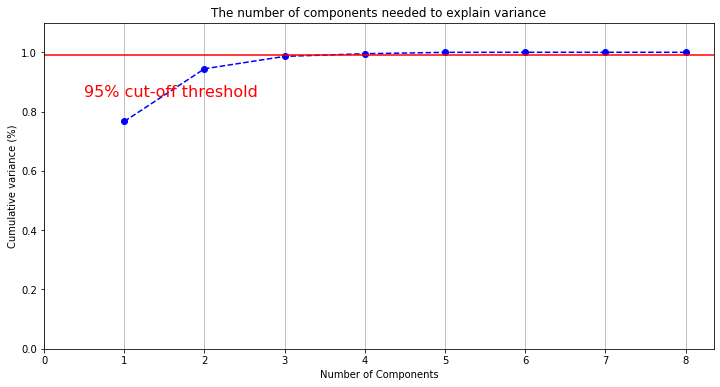

In [14]:
pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#3 PCA components needed here

In [10]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

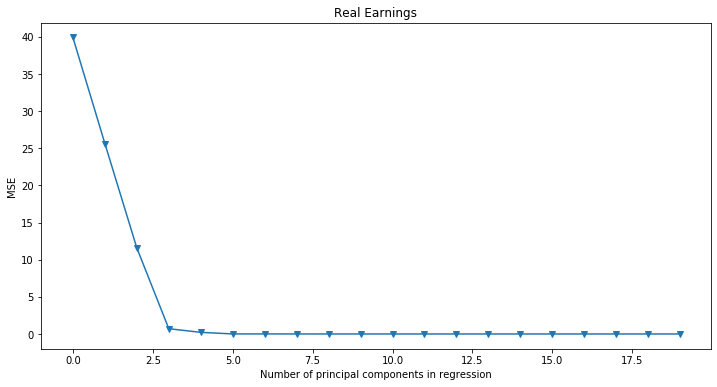

In [15]:
pca2 = PCA()
regr = LinearRegression()
# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(df12X, df12Y, test_size=0.3, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Real Earnings')
plt.xlim(xmin=-1);

In [16]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

1.2904721728416098